### Cross Validation with Linear Regression

The idea here is to try cross validation and learn more about it.
Linear Regression would be taken as an example.

We will try the following steps 
- Building a LR model withour cross validation 

Build a linear regression model without cross validation

In [93]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [94]:
# import more libraries
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# supress warnings
import warnings 
warnings.filterwarnings('ignore')

In [95]:
# Reading Housing.csv file 
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.shape

(545, 13)

In [5]:
len(housing)

545

In [6]:
housing.size

7085

In [7]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Performing Linear Regression with only one feature

In [10]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [96]:
# Performing regression with only "area" & "price"
df = housing.loc[:,['area', 'price']]
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [98]:
df.columns

Index(['area', 'price'], dtype='object')

In [99]:
df_columns = df.columns
df_columns

Index(['area', 'price'], dtype='object')

In [100]:
# Using a MinMaxScaler for rescaling
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# Rename columns since it is now an np array 
df = pd.DataFrame(df)
df.columns = df_columns

In [101]:
df.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


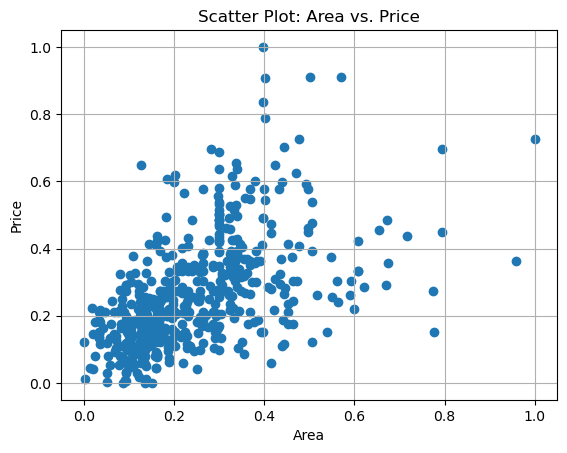

In [102]:
# Visualizing the relationship between area and price
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot: Area vs. Price')
plt.grid(True)
plt.show()

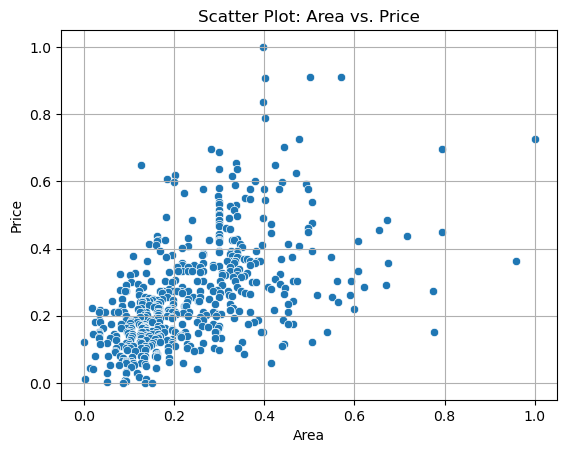

In [103]:
# Visualizing the relationship between area and price
sns.scatterplot(data=df, x='area', y='price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot: Area vs. Price')
plt.grid(True)
plt.show()

In [104]:
# Split into train-test split 
df_train, df_test = train_test_split(df, 
                                     train_size=0.7, 
                                     test_size=0.3, 
                                     random_state=10)

print(len(df_train))
print(len(df_test))

381
164


In [105]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['area']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['price']

X_test = df_test['area']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['price']

Polynomial Regression

In [24]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

381
381
164
164


In [32]:
# fit multiple polynomial features 
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))


In [33]:
for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

In [34]:
type(y_test_pred)

numpy.ndarray

In [35]:
y_test_pred.shape

(164, 6)

In [37]:
# y_test_pred[5:]
y_test_pred[:5, :]

array([[0.17935133, 0.15642413, 0.15651193, 0.14906616, 0.14253061,
        0.15190732],
       [0.2188105 , 0.22198592, 0.2217592 , 0.20326006, 0.20806603,
        0.21568224],
       [0.23920512, 0.25250699, 0.25221568, 0.2389639 , 0.24091009,
        0.25226475],
       [0.27910765, 0.30559007, 0.30532545, 0.31245748, 0.30156331,
        0.29072798],
       [0.30570934, 0.33610227, 0.33594235, 0.35612154, 0.35154404,
        0.35906052]])

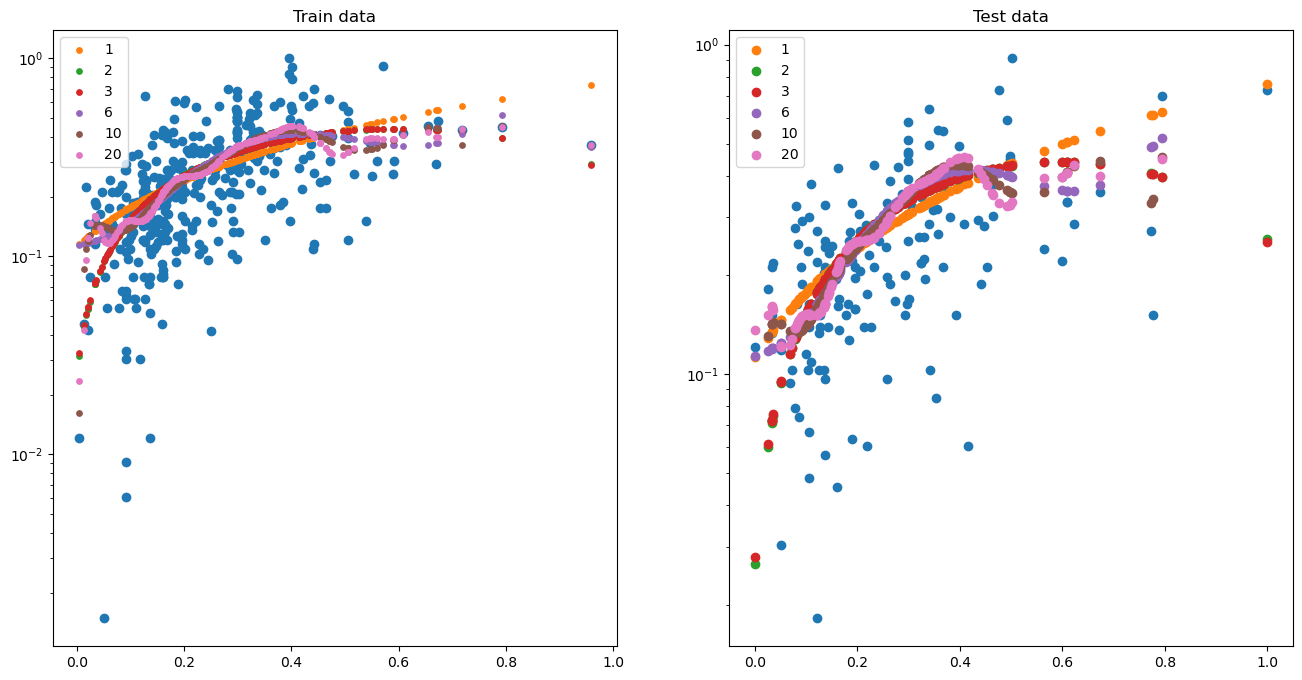

In [43]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')

 # test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')   

In [44]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.29, test score=0.25
Polynomial degree 2: train score=0.34, test score=0.22
Polynomial degree 3: train score=0.34, test score=0.22
Polynomial degree 6: train score=0.36, test score=0.11
Polynomial degree 10: train score=0.37, test score=-108.76
Polynomial degree 20: train score=0.38, test score=-301329899923.94


In [49]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Assuming y_train is a pandas Series and y_train_pred is a numpy array
# Make sure they have the same length

# Calculate R-squared for each column
r2_scores = []
for col in range(y_train_pred.shape[1]):
    r2 = r2_score(y_train, y_train_pred[:, col])
    r2_scores.append(r2)

# Convert the scores to a pandas Series (optional)
r2_scores_series = pd.Series(r2_scores, index=range(1, y_train_pred.shape[1] + 1))

print("R-squared scores for each column:")
print(r2_scores_series)

R-squared scores for each column:
1    0.292664
2    0.344445
3    0.344451
4    0.364881
5    0.372449
6    0.379723
dtype: float64


Building a model without cross validation

Let's build a multiple regression model. First, let's build a vanilla MLR model without any cross-validation. 

In [50]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [51]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [52]:
# data preparation 

# list of all the "yes-no" binary categorical variables; we'll map yes to 1 and no to 0
binary_vars_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# defining the map function 
def binary_map(x):
    return x.map({"yes": 1, "no": 0})

housing[binary_vars_list] = housing[binary_vars_list].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [55]:
housing["furnishingstatus"].value_counts()
housing["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [56]:
# 'dummy' variables
# get dummy variables for 'furnishingstatus' 
# also, drop the first column of the resulting df (since n-1 dummy vars suffice)
status = pd.get_dummies(housing["furnishingstatus"], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [57]:
status = status.astype(int)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [58]:
# concat the dummy variable df with the main df
housing = pd.concat([housing, status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [59]:
# 'furnishingstatus' since we alreday have the dummy vars
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


Splitting into Train and Test

In [60]:
# Train - Test Split
df_train, df_test = train_test_split(housing,
                                     train_size=.7, 
                                     test_size=.3,
                                     random_state=100)


# rescale the features
scaler = MinMaxScaler()



In [61]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [62]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [63]:
# Apply scaler to all the numeric columns 
# numeric_vars = [price	area	bedrooms	bathrooms	stories]
numeric_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,1,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,1,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,2,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,2,0,0,1


In [65]:
# apply rescaling to the test set also
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0,1,1,0
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,1,0,1,0
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,1,1,1,0
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0,1,1,0
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0,0,1,0


In [66]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

In [67]:
print(len(X_train))
print(len(y_train))

381
381


In [69]:
print(len(X_test))
print(len(y_test))

164
164


In [70]:
# first model with an arbitrary choice of n_features
# running RFE with number of features=10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [71]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 2),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 3),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', True, 1)]

In [72]:
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.5749143385354287

In [74]:
# Try with another value of RFE 
import sklearn.metrics


lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=6)
rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
r2

0.5350445027578824

Cross Validation in sklearn

In [75]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.6829775 , 0.69324306, 0.6762109 , 0.61782891, 0.59266171])

In [76]:
# the other way of doing the same thing (more explicit)
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.59930574, 0.71307628, 0.61325733, 0.62739077, 0.6212937 ])

In [77]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00806336, -0.00658776, -0.0064797 , -0.0070743 , -0.01523682])

Hyperparameter Tuning Using Grid Search Cross-Validation

In [78]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,1,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,1,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,2,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,2,0,0,1


In [81]:
len(X_train.columns)

13

In [82]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator=rfe, 
                        param_grid=hyper_params, 
                        scoring='r2',
                        cv = folds, 
                        verbose=1, 
                        return_train_score=True)

# fit the model 
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [84]:
type(model_cv.cv_results_)

dict

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020141,0.005264,0.003314,0.000565,1,{'n_features_to_select': 1},0.172606,0.351721,0.206887,0.165910,...,0.243658,0.077627,13,0.302971,0.265961,0.280611,0.300768,0.269025,0.283867,0.015506
1,0.015747,0.001203,0.002702,0.000603,2,{'n_features_to_select': 2},0.335665,0.428751,0.439969,0.505321,...,0.438360,0.058374,12,0.505799,0.489802,0.462091,0.474178,0.471907,0.480755,0.015355
2,0.014246,0.001105,0.002609,0.000479,3,{'n_features_to_select': 3},0.421848,0.539257,0.491515,0.604426,...,0.516805,0.059902,11,0.568074,0.544917,0.542889,0.534685,0.542412,0.546596,0.011289
3,0.012809,0.001508,0.002602,0.000492,4,{'n_features_to_select': 4},0.436647,0.554106,0.494461,0.600237,...,0.521105,0.055127,10,0.573508,0.550184,0.549490,0.541496,0.549291,0.552794,0.010833
4,0.011505,0.001790,0.002200,0.000748,5,{'n_features_to_select': 5},0.505213,0.611645,0.492807,0.590812,...,0.544265,0.047808,8,0.611976,0.590440,0.584663,0.549413,0.589397,0.585178,0.020214
5,0.011107,0.001116,0.002474,0.000450,6,{'n_features_to_select': 6},0.522105,0.618124,0.488411,0.527379,...,0.540843,0.043146,9,0.635273,0.593967,0.596348,0.606852,0.601063,0.606700,0.014950
6,0.010108,0.000903,0.002400,0.000490,7,{'n_features_to_select': 7},0.536798,0.667827,0.552385,0.534634,...,0.571965,0.049432,7,0.638254,0.625136,0.630137,0.646285,0.638313,0.635625,0.007320
7,0.009106,0.000491,0.002200,0.000400,8,{'n_features_to_select': 8},0.575736,0.700503,0.592323,0.584673,...,0.606729,0.047204,5,0.665553,0.640241,0.654028,0.658968,0.657277,0.655213,0.008377
8,0.008402,0.000489,0.002756,0.000796,9,{'n_features_to_select': 9},0.567595,0.705783,0.587816,0.586152,...,0.600937,0.053658,6,0.674034,0.646200,0.667647,0.670011,0.670880,0.665754,0.009989
9,0.007122,0.000485,0.002904,0.000665,10,{'n_features_to_select': 10},0.598898,0.716918,0.596375,0.607600,...,0.620461,0.048897,4,0.678851,0.655935,0.677938,0.674451,0.674669,0.672369,0.008399


In [106]:
# cv_results.to_csv('data.csv', index=False)

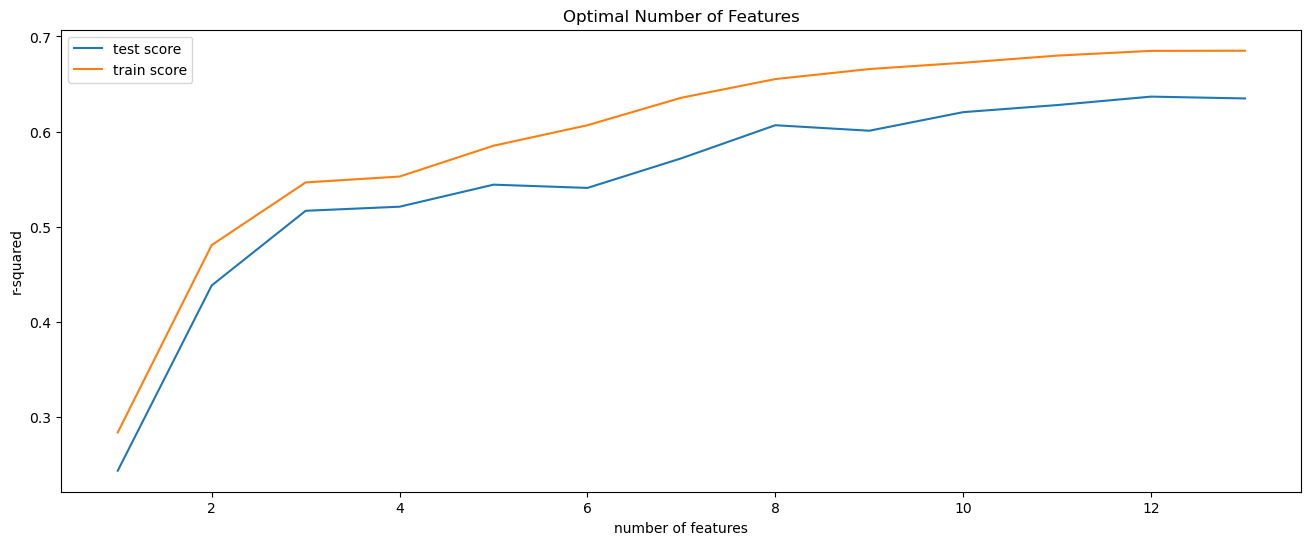

In [89]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [91]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5749143385354287


In [92]:
# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5995575338728534
